## Acá haremos el preprocesamiento de los datos.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

df = pd.read_csv('data_para_preprocessing_con_gh.csv')
pd.set_option('display.max_columns',None)

Hay columnas que no podemos usar para la predicción en sí por ahora, por eso, procederemos a deshacernos de ellas. Las columnas involucradas son: 'Unnamed:0','Unnamed:0.1','descripcion','Direccion','Fecha_pub','Ubicacion','SinNombre','Area_constr','Area_total','match'

In [4]:
cols_to_drop = ['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0.1.1','Descripcion','Direccion','Fecha_pub','Ubicacion','Area_constr','Area_total','match']
df.drop(cols_to_drop,axis=1,inplace=True)

In [5]:
df.head(2)

,Antiguedad,Anunciante,Balneario,NroBanios,Nro_pisos,Cocheras,Dormitorios,Estado de Inmueble,Luminosidad,Mascotas,Precio,Tipo,TipoCochera,Uso_comercial,Uso_profesional,latitud,longitud,Area_constr_m2,Area_total_m2,'Cuarto de servicio','Deposito','Terraza','Kitchenette','Sala de estar','Sotano','Patio','anx81tico','Comedor diario','Comedor','Banio de servicio','Jardanxadn Interno','Walking Closet','Escritorio','Cocina','Banio independiente','Lavanderanxada','Balcon','Sala','Closet','Banio de visitas','Agua','Guardiananxada','Internet','Luz','Cable','Servicio de Limpieza','Conexion a gas','Sistema de seguridad','Telefono','Areadeportiva','Piscina','Solarium','Sala de internet','Sala de cine','Jardanxadn','Parque interno','Guarderanxada','anx81reas verdes','Club House','Hall de ingreso','Areade BBQ','Gimnasio','Areade sauna','Juegos para ninios','Ingreso independiente','Colegios cercanos','Cerca al mar','Centros comerciales cercanos','Parques cercanos','Acceso personas discapacidad','Frente al mar','Desagaue','Jacuzzi','Chimenea','Intercomunicador','Cerco Electrico','Parrilla','Aire acondicionado','Amoblado','Sauna','Calefaccion','Equipado','Terma','Portero electrico','Cocina con reposteros',Distrito,Provincia,geohash_grado6,geohash_grado5,geohash_grado7,geohash_grado8
0,5.0,Valentinoinmobiliaria,Nulo,4.0,2.0,3.0,3,Excelente,Muy luminoso,Si,885000.0,Casa,Paralelas,No,NoEspecifica,-12.077232,-76.929494,450.0,600.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LaMolina,Lima,6mc733,6mc73,6mc733m,6mc733mt
1,5.0,No disponible,Nulo,5.0,3.0,1.0,5+,Excelente,Muy luminoso,Si,150000.0,Casa,NoEspecifica,Si,Si,-12.005022,-76.872657,350.0,183.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lurigancho,Lima,6mc7dw,6mc7d,6mc7dwx,6mc7dwx1


Ahora, como sabemos, tenemos data numérica y categórica. Proceremos a separar este tipo de data y hacer el encoding.

In [6]:
object_cols = [col for col in df.columns if df[col].dtype == 'object']

En este caso usaremos una función encontrada en Kaggle. Personalmente, he buscado varias opciones para hacer el target encoding pero este kernel es el que nos da de manera más completa el output. También, he optado por elegir el método smooth del target encoding, es decir, usar el método de forma que no caiga en tanto riesgo de overfitting. Esto tiene varias variantes pero por ahora usaré el smooth (que le da peso a la media total del target) 

- Fuente Kaggle: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features

- Fuente teórica: https://maxhalford.github.io/blog/target-encoding-done-the-right-way/

In [7]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

Usaremos las funciones importadas, pero esto requiere que hagamos un train y test antes poder invocar a la función. 

In [8]:
X = df.drop('Precio',axis=1)
Y = df['Precio']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y) #Acá dividimos la data

train = df.loc[X_train.index]
test = df.loc[X_test.index]

In [9]:
#Aplicando la función para el target_encode para todas las columnas que quiera. 
trn, sub = target_encode(train['Distrito'],
                         test['Distrito'],
                         target = train.Precio,
                         min_samples_leaf = 10,
                         smoothing = 5,
                         noise_level=0.01)

In [10]:
for obj_col in object_cols:
    temp_trn, temp_sub = target_encode(train[obj_col],
                                       test[obj_col],
                                       target = train.Precio,
                                       min_samples_leaf = 10,
                                       smoothing = 5,
                                       noise_level = 0.01)
    train[obj_col] = temp_trn
    test[obj_col] = temp_sub

In [11]:
X_train = train.drop('Precio',axis=1)
X_test = test.drop('Precio',axis=1)
y_train = train.Precio
y_test = test.Precio

### Ahora que ya hice mi encoding armaremos un pequeño modelo.

In [12]:
from sklearn.tree import DecisionTreeRegressor
dt_r = DecisionTreeRegressor(criterion='mae')

dt_r.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mae', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [13]:
dt_r.score(X_test,y_test)

-0.05035793413035705

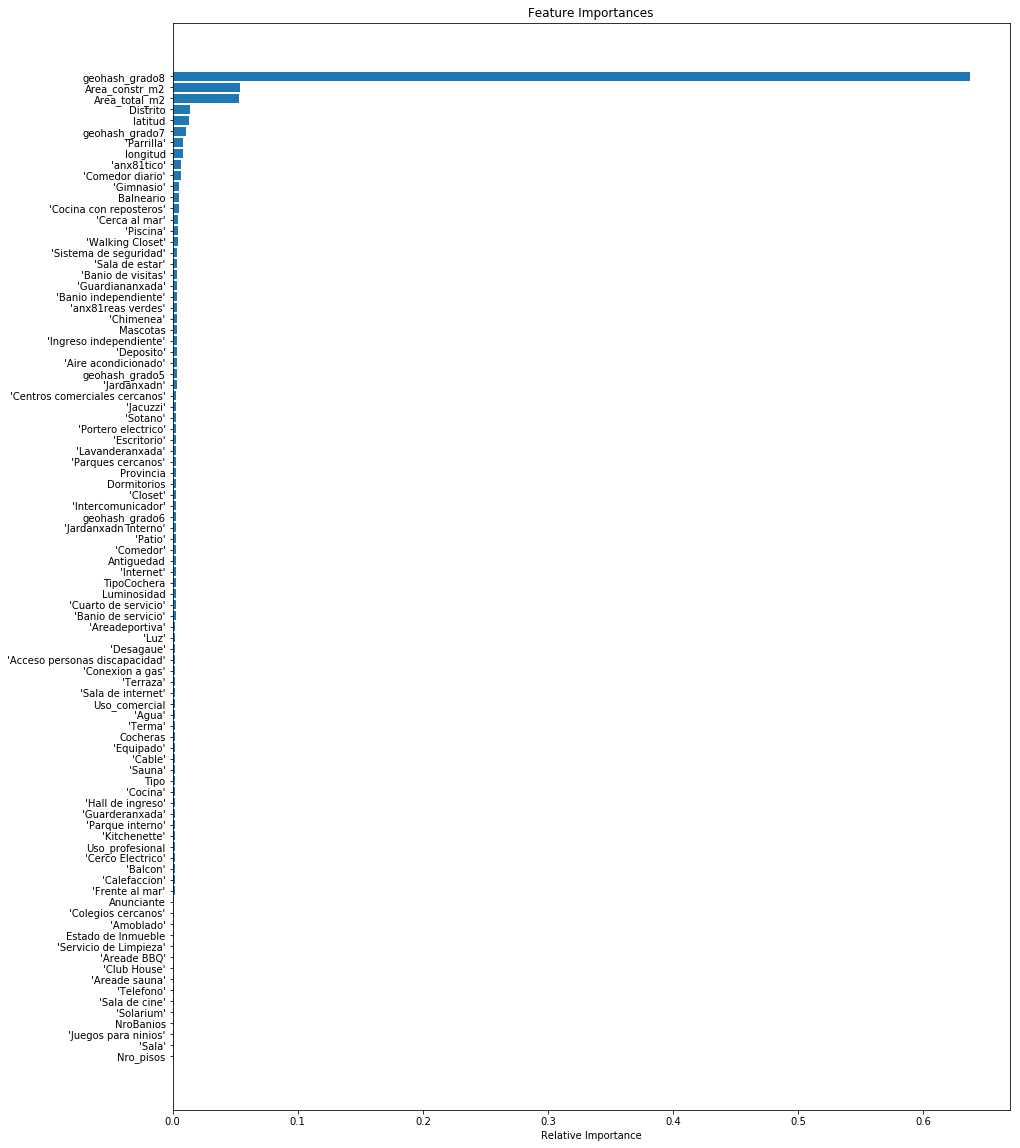

In [20]:
importances = dt_r.feature_importances_
cols = X_train.columns
plt.figure(figsize=(15,20))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align = 'center')
plt.yticks(range(len(indices)),[cols[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [17]:
predict = dt_r.predict(X_test)
[*predict]

[930000.0,
 230000.0,
 3000000.0,
 1160000.0,
 850000.0,
 740000.0,
 570000.0,
 450000.0,
 570000.0,
 230000.0,
 890000.0,
 990000.0,
 825000.0,
 340000.0,
 480000.0,
 720000.0,
 480000.0,
 255000.0,
 180000.0,
 835000.0,
 300000.0,
 1050000.0,
 750000.0,
 1150000.0,
 570000.0,
 1099000.0,
 980000.0,
 1850000.0,
 980000.0,
 880000.0,
 440000.0,
 580000.0,
 1300000.0,
 1400000.0,
 420000.0,
 790000.0,
 920000.0,
 225000.0,
 295000.0,
 840000.0,
 225000.0,
 505000.0,
 760000.0,
 2800000.0,
 900000.0,
 145000.0,
 1300000.0,
 1200000.0,
 252000.0,
 750000.0,
 1300000.0,
 480000.0,
 480000.0,
 500000.0,
 1800000.0,
 1200000.0,
 1200000.0,
 940000.0,
 650000.0,
 897000.0,
 900000.0,
 150000.0,
 720000.0,
 1050000.0,
 730000.0,
 895000.0,
 1680000.0,
 750000.0,
 520000.0,
 430000.0,
 1150000.0,
 560000.0,
 865000.0,
 865000.0,
 230000.0,
 850000.0,
 370000.0,
 799000.0,
 1150000.0,
 1160000.0,
 930000.0,
 1400000.0,
 370000.0,
 580000.0,
 915000.0,
 230000.0,
 890000.0,
 520000.0,
 990000.0,


In [15]:
y_test

4667     890000.0
2465      75000.0
4091    3000000.0
2854      78000.0
2540     800000.0
5588     460000.0
2320     184000.0
6460    1000000.0
3330     285000.0
744      200000.0
1901     280000.0
568      899999.0
4145    1600000.0
1202     198999.0
3157     210000.0
7325    1850000.0
5266     155000.0
6566     570000.0
7653     170000.0
4900     720000.0
2316     385000.0
6713    1875000.0
2489     780000.0
6117     980000.0
5543     390000.0
4878    1280000.0
3010     550000.0
7146    1390000.0
694      465000.0
380      700000.0
          ...    
2697     490000.0
4849     159000.0
4611     180000.0
4178     720000.0
975      350000.0
5429     280000.0
462     1600000.0
6353     220000.0
7650    1100000.0
1052     520000.0
5904     550000.0
5634    4500000.0
537      185000.0
3346     500000.0
4712     950000.0
4998    1190000.0
5920    1050000.0
6003    1050000.0
1657     400000.0
2819     900000.0
680      550000.0
4601    4900000.0
4180     598000.0
2034      63000.0
47       2

In [26]:
from sklearn.tree import DecisionTreeRegressor